# CleanAir Quest Air Pollution Monitoring Project
### - In this notebook, we will load the data received from querying the OpenWeatherMap API and conduct exploratory data analysis to ensure the data is consistent, clean and high quality.
### - We will then build a model using the data to identify the optimal location for our pollution monitoring station.

## Loading the data
We read all the json files and merge them into a dataframe

In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Add all json files in the Data directory to a list
file_path = 'Data/'
json_files = [file for file in os.listdir(file_path) if file.endswith('.json')]

# Load data into pandas and create dictionary to hold all dataframes
dataframes = {}
for file in json_files:
    f_path = os.path.join(file_path, file)
    with open(f_path, 'r') as temp:
        data = json.load(temp)  
        df = pd.DataFrame(data['list'])
        df['lat'] = data['coord']['lat']
        df['lon'] = data['coord']['lon']
        dataframes[file.split('.json')[0]] = df

In [3]:
# Create one dataframe
air_pollution_df = pd.concat(dataframes.values(), ignore_index=True)
air_pollution_df.head(10)

,main,components,dt,lat,lon
0,{'aqi': 2},"{'co': 580.79, 'no': 0.53, 'no2': 5.1, 'o3': 4...",1609488000,-1.2837,36.7494
1,{'aqi': 1},"{'co': 554.09, 'no': 0.41, 'no2': 5.4, 'o3': 3...",1609491600,-1.2837,36.7494
2,{'aqi': 1},"{'co': 494, 'no': 0.34, 'no2': 5.4, 'o3': 36.1...",1609495200,-1.2837,36.7494
3,{'aqi': 1},"{'co': 447.27, 'no': 0.33, 'no2': 4.63, 'o3': ...",1609498800,-1.2837,36.7494
4,{'aqi': 1},"{'co': 403.88, 'no': 0.3, 'no2': 3.98, 'o3': 3...",1609502400,-1.2837,36.7494
5,{'aqi': 1},"{'co': 420.57, 'no': 0.31, 'no2': 4.93, 'o3': ...",1609506000,-1.2837,36.7494
6,{'aqi': 1},"{'co': 467.3, 'no': 0.3, 'no2': 6.43, 'o3': 25...",1609509600,-1.2837,36.7494
7,{'aqi': 1},"{'co': 500.68, 'no': 0.19, 'no2': 7.54, 'o3': ...",1609513200,-1.2837,36.7494
8,{'aqi': 1},"{'co': 547.41, 'no': 0.05, 'no2': 7.97, 'o3': ...",1609516800,-1.2837,36.7494
9,{'aqi': 2},"{'co': 600.82, 'no': 0.04, 'no2': 8.05, 'o3': ...",1609520400,-1.2837,36.7494


## Cleaning the Data

In [4]:
air_pollution_df.rename(columns={'main':'air_quality_index'}, inplace=True)

In [5]:
air_pollution_df['air_quality_index'] = air_pollution_df['air_quality_index'].str['aqi']

In [6]:
# Create columns for each component of Air Pollution
air_pollution_df['CO_conc'] = air_pollution_df['components'].str['co']
air_pollution_df['NO_conc'] = air_pollution_df['components'].str['no']
air_pollution_df['NO2_conc'] = air_pollution_df['components'].str['no2']
air_pollution_df['O3_conc'] = air_pollution_df['components'].str['o3']
air_pollution_df['SO2_conc'] = air_pollution_df['components'].str['so2']
air_pollution_df['fine_prtcls'] = air_pollution_df['components'].str['pm2_5']
air_pollution_df['coarse_prtcls'] = air_pollution_df['components'].str['pm10']
air_pollution_df['ammonia'] = air_pollution_df['components'].str['nh3']


In [7]:
# Convert unix time to datetime
air_pollution_df['datetime'] = pd.to_datetime(air_pollution_df['dt'], unit='s')

In [8]:
# Drop the 'components' column
air_pollution_df.drop(columns=['components','dt'], inplace=True)

In [9]:
air_pollution_df.shape

(155862, 12)

In [10]:
air_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155862 entries, 0 to 155861
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   air_quality_index  155862 non-null  int64         
 1   lat                155862 non-null  float64       
 2   lon                155862 non-null  float64       
 3   CO_conc            155862 non-null  float64       
 4   NO_conc            155862 non-null  float64       
 5   NO2_conc           155862 non-null  float64       
 6   O3_conc            155862 non-null  float64       
 7   SO2_conc           155862 non-null  float64       
 8   fine_prtcls        155862 non-null  float64       
 9   coarse_prtcls      155862 non-null  float64       
 10  ammonia            155862 non-null  float64       
 11  datetime           155862 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 14.3 MB


In [11]:
#Convert lat and lon to string objects
air_pollution_df[['lat','lon']] = air_pollution_df[['lat','lon']].astype(str)

In [12]:
# Create year, 
air_pollution_df['year'] = air_pollution_df['datetime'].dt.year
air_pollution_df['month'] = air_pollution_df['datetime'].dt.month
air_pollution_df['day'] = air_pollution_df['datetime'].dt.day

In [13]:
air_pollution_df.head()

,air_quality_index,lat,lon,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,datetime,year,month,day
0,2,-1.2837,36.7494,580.79,0.53,5.10,42.92,6.32,9.98,21.97,6.14,2021-01-01 08:00:00,2021,1,1
1,1,-1.2837,36.7494,554.09,0.41,5.40,39.34,6.91,7.78,18.73,6.46,2021-01-01 09:00:00,2021,1,1
2,1,-1.2837,36.7494,494.00,0.34,5.40,36.12,6.91,5.88,15.08,6.21,2021-01-01 10:00:00,2021,1,1
3,1,-1.2837,36.7494,447.27,0.33,4.63,34.69,5.96,4.63,12.55,5.70,2021-01-01 11:00:00,2021,1,1
4,1,-1.2837,36.7494,403.88,0.30,3.98,31.83,4.83,3.60,10.23,5.00,2021-01-01 12:00:00,2021,1,1


In [14]:
air_pollution_df.describe()

,air_quality_index,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,datetime,year,month,day
count,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862.000000,155862,155862.000000,155862.000000,155862.000000
mean,2.559136,781.939603,0.618114,7.822798,34.584194,5.290381,21.972173,43.818366,10.537128,2021-12-30 11:14:30.793393920,2021.496016,6.525465,15.684606
min,1.000000,161.890000,0.000000,0.200000,0.000000,0.050000,0.500000,3.870000,0.830000,2021-01-01 08:00:00,2021.000000,1.000000,1.000000
25%,2.000000,480.650000,0.000000,3.900000,18.780000,2.620000,8.110000,20.820000,6.210000,2021-07-01 17:00:00,2021.000000,4.000000,8.000000
50%,2.000000,627.520000,0.080000,6.080000,28.610000,4.470000,13.550000,32.290000,8.990000,2021-12-29 02:30:00,2021.000000,7.000000,16.000000
75%,4.000000,894.550000,0.370000,9.510000,44.700000,6.740000,23.290000,50.850000,13.170000,2022-06-29 12:00:00,2022.000000,10.000000,23.000000
max,5.000000,8331.300000,98.350000,108.300000,223.160000,34.810000,577.470000,713.550000,95.250000,2022-12-31 21:00:00,2022.000000,12.000000,31.000000
std,1.238163,558.384853,3.529935,6.601002,23.647428,3.921184,32.814811,44.750703,6.224913,NaN,0.499986,3.430834,8.807858


## Removing Outliers
From the summary statistics, there are clear outliers in all components of air quality present in the dataset.\
We dive deeper into the specific attributes and drop any outliers that may affect the quality of our analysis.

In [15]:
# Validate the air quality index to ensure all entries have figures between 1 and 5.
air_pollution_df['air_quality_index'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [16]:
# Validate the lat and lon columns to ensure only 9 unique entries are available, representing our 9 locations.
print(air_pollution_df['lon'].unique())
print(air_pollution_df['lat'].unique())

['36.7494' '36.7375' '36.8958' '36.7368' '36.8722' '36.8504' '36.8899'
 '36.8264' '36.8032']
['-1.2837' '-1.2959' '-1.2229' '-1.3534' '-1.293' '-1.2608' '-1.2204'
 '-1.2905' '-1.2629']


In [17]:
air_pollution_df.sample(5)

,air_quality_index,lat,lon,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,datetime,year,month,day
50285,1,-1.2229,36.8958,473.98,0.36,4.80,65.80,7.09,6.76,16.69,8.74,2022-10-20 09:00:00,2022,10,20
153501,2,-1.2629,36.8032,574.11,0.51,4.07,77.25,4.65,10.42,24.95,12.67,2022-09-21 13:00:00,2022,9,21
109769,2,-1.2204,36.8899,547.41,0.14,6.94,36.84,5.07,8.19,20.94,11.27,2021-09-03 13:00:00,2021,9,3
38310,4,-1.2229,36.8958,1001.36,0.37,11.31,45.78,11.92,23.25,50.38,18.49,2021-06-04 10:00:00,2021,6,4
17106,2,-1.2837,36.7494,507.35,0.00,2.91,27.18,2.83,6.10,21.93,5.51,2022-12-22 02:00:00,2022,12,22


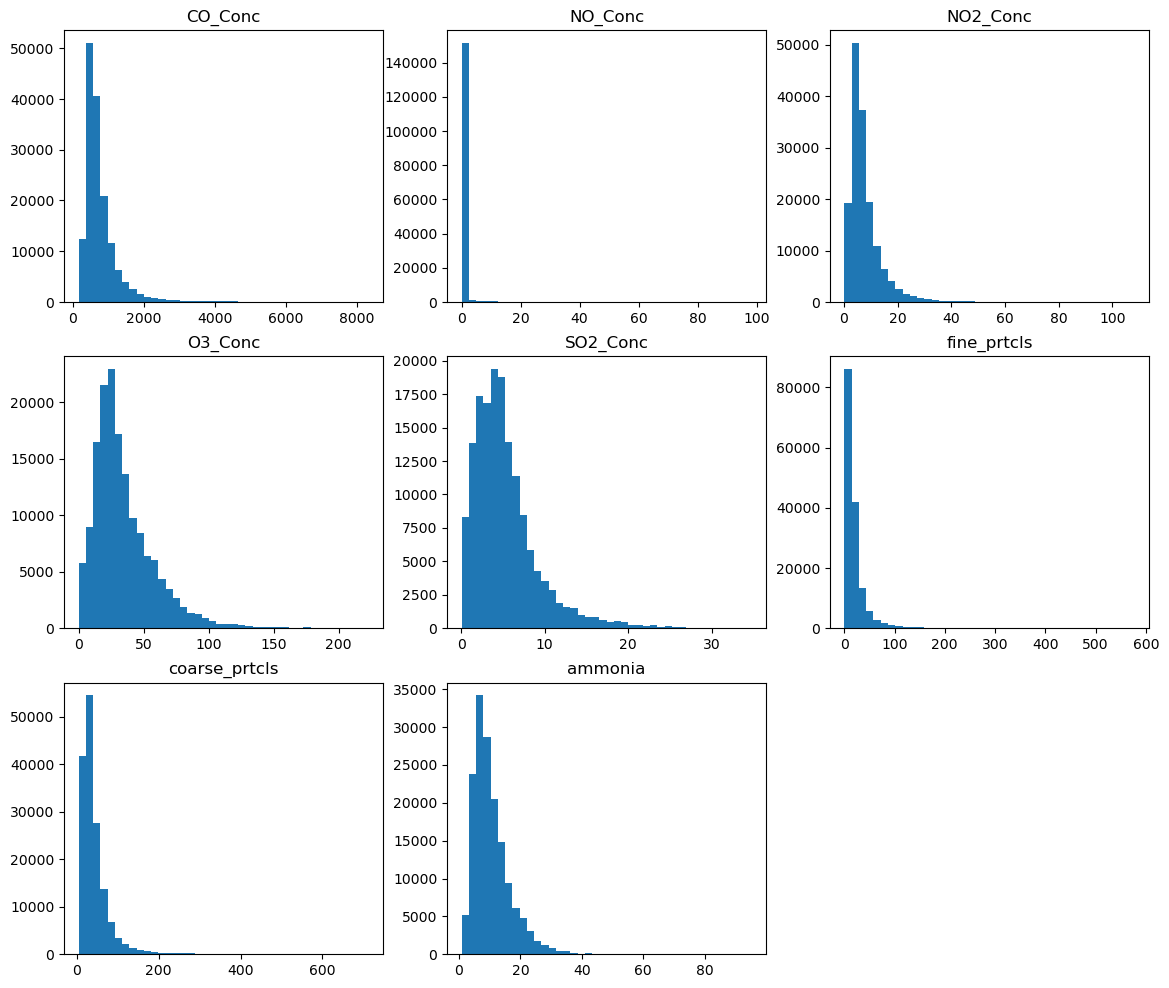

In [18]:
# Use histograms to check distributions for skewness.

plt.figure(figsize = (14,12))
# plot 1
plt.subplot(3, 3, 1)
plt.hist(air_pollution_df.CO_conc, bins = 40);
plt.title('CO_Conc')
# plot 2
plt.subplot(3, 3, 2)
plt.hist(air_pollution_df.NO_conc, bins = 40);
plt.title('NO_Conc')
# plot 3
plt.subplot(3, 3, 3)
plt.hist(air_pollution_df.NO2_conc, bins = 40);
plt.title('NO2_Conc')
# plot 4
plt.subplot(3, 3, 4)
plt.hist(air_pollution_df.O3_conc, bins = 40);
plt.title('O3_Conc')
# plot 5
plt.subplot(3, 3, 5)
plt.hist(air_pollution_df.SO2_conc, bins = 40);
plt.title('SO2_Conc')
# plot 6
plt.subplot(3, 3, 6)
plt.hist(air_pollution_df.fine_prtcls, bins = 40);
plt.title('fine_prtcls')
# plot 7
plt.subplot(3, 3, 7)
plt.hist(air_pollution_df.coarse_prtcls, bins = 40);
plt.title('coarse_prtcls')
# plot 8
plt.subplot(3, 3, 8)
plt.hist(air_pollution_df.ammonia, bins = 40);
plt.title('ammonia')

plt.show()

We shall use the standard deviation to select our outlier threshold.\
Any entries that are more than 3 SDs (**Z-score > 3**) away from the mean will be dropped.

In [19]:
# Function that returns a dataframe with columns filtered for outliers using the SD metric
column_list = ['CO_conc','NO_conc','NO2_conc','O3_conc','SO2_conc','fine_prtcls','coarse_prtcls','ammonia']
def filtered_df(columns, air_pollution_df):
    for column in columns:
        upper_l = air_pollution_df[column].mean() + air_pollution_df[column].std()*4
        lower_l = air_pollution_df[column].mean()-(air_pollution_df[column].std()*4)

        air_pollution_df = air_pollution_df[(air_pollution_df[column] < upper_l) & (air_pollution_df[column] > lower_l)]
    return air_pollution_df

In [20]:
filtered_air_pollution_df = filtered_df(column_list, air_pollution_df)

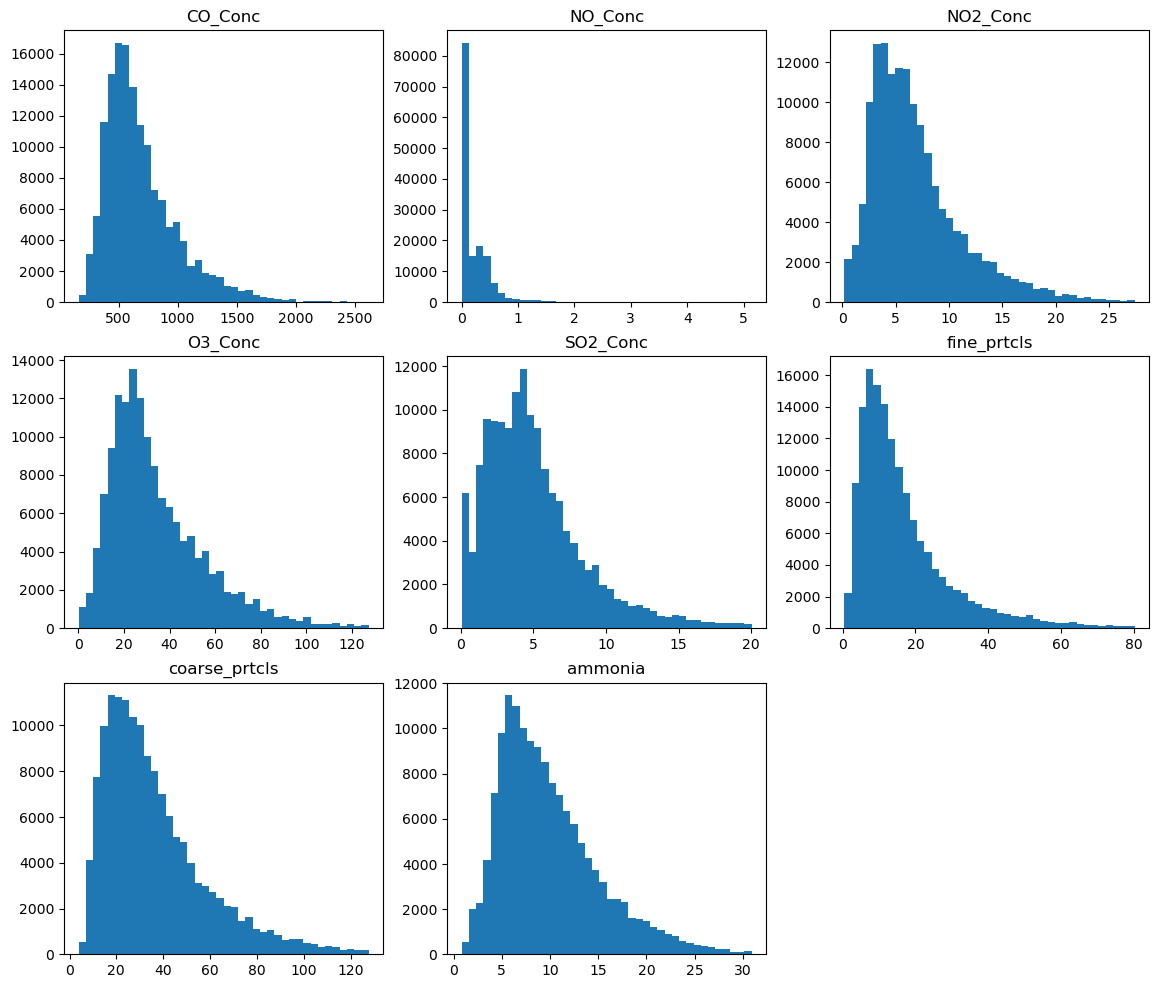

In [21]:
# Use histograms to check distributions for skewness.

plt.figure(figsize = (14,12))
# plot 1
plt.subplot(3, 3, 1)
plt.hist(filtered_air_pollution_df.CO_conc, bins = 40);
plt.title('CO_Conc')
# plot 2
plt.subplot(3, 3, 2)
plt.hist(filtered_air_pollution_df.NO_conc, bins = 40);
plt.title('NO_Conc')
# plot 3
plt.subplot(3, 3, 3)
plt.hist(filtered_air_pollution_df.NO2_conc, bins = 40);
plt.title('NO2_Conc')
# plot 4
plt.subplot(3, 3, 4)
plt.hist(filtered_air_pollution_df.O3_conc, bins = 40);
plt.title('O3_Conc')
# plot 5
plt.subplot(3, 3, 5)
plt.hist(filtered_air_pollution_df.SO2_conc, bins = 40);
plt.title('SO2_Conc')
# plot 6
plt.subplot(3, 3, 6)
plt.hist(filtered_air_pollution_df.fine_prtcls, bins = 40);
plt.title('fine_prtcls')
# plot 7
plt.subplot(3, 3, 7)
plt.hist(filtered_air_pollution_df.coarse_prtcls, bins = 40);
plt.title('coarse_prtcls')
# plot 8
plt.subplot(3, 3, 8)
plt.hist(filtered_air_pollution_df.ammonia, bins = 40);
plt.title('ammonia')

plt.show()

## Further Exploratory Analysis

Text(0.5, 1.0, 'Air Quality index per count')

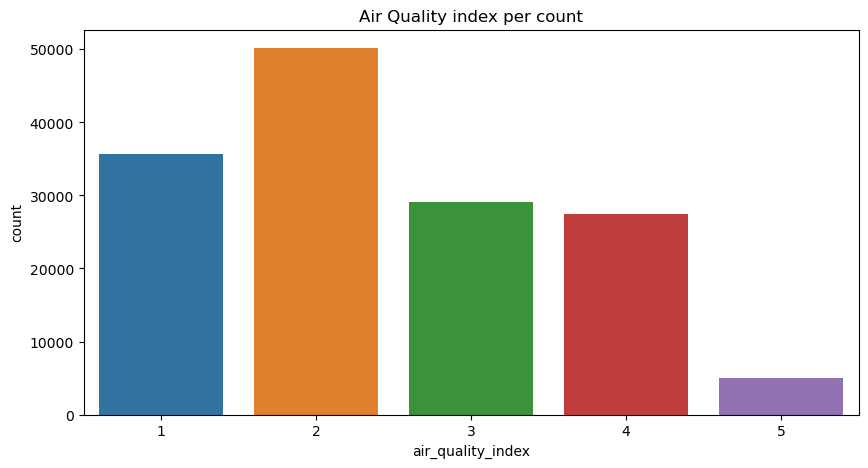

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='air_quality_index',data = filtered_air_pollution_df)
plt.title("Air Quality index per count")

<Axes: xlabel='lat', ylabel='air_quality_index'>

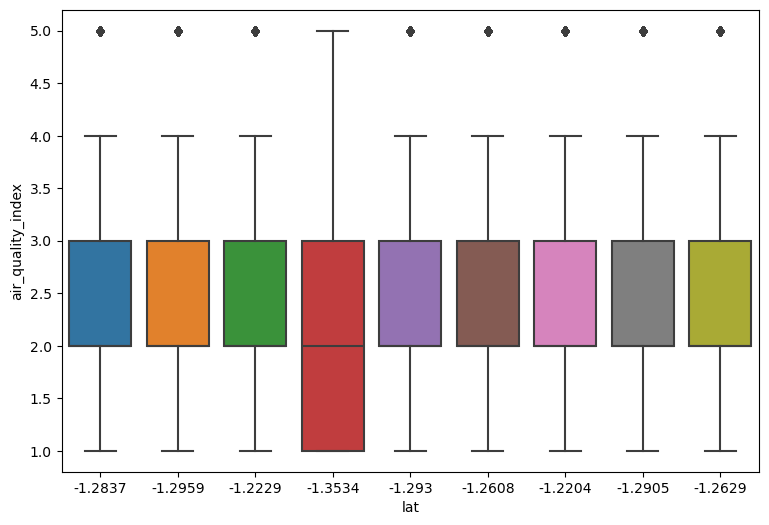

In [23]:
plt.figure(figsize=(9,6))
sns.boxplot(x='lat',y='air_quality_index',data=filtered_air_pollution_df)

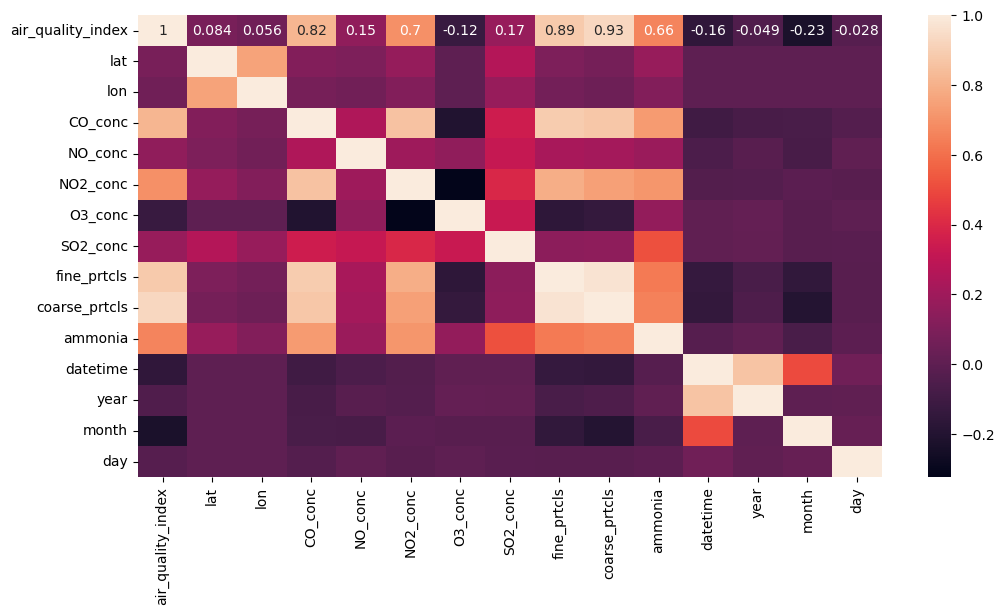

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(filtered_air_pollution_df.corr(),annot=True);

In [27]:
filtered_air_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147359 entries, 0 to 155861
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   air_quality_index  147359 non-null  int64         
 1   lat                147359 non-null  object        
 2   lon                147359 non-null  object        
 3   CO_conc            147359 non-null  float64       
 4   NO_conc            147359 non-null  float64       
 5   NO2_conc           147359 non-null  float64       
 6   O3_conc            147359 non-null  float64       
 7   SO2_conc           147359 non-null  float64       
 8   fine_prtcls        147359 non-null  float64       
 9   coarse_prtcls      147359 non-null  float64       
 10  ammonia            147359 non-null  float64       
 11  datetime           147359 non-null  datetime64[ns]
 12  year               147359 non-null  int32         
 13  month              147359 non-null  int32        

## Feature Engineering

In [28]:
filtered_air_pollution_df = filtered_air_pollution_df.drop('datetime',axis=1)

In [29]:
filtered_air_pollution_df.head()

,air_quality_index,lat,lon,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,year,month,day
0,2,-1.2837,36.7494,580.79,0.53,5.10,42.92,6.32,9.98,21.97,6.14,2021,1,1
1,1,-1.2837,36.7494,554.09,0.41,5.40,39.34,6.91,7.78,18.73,6.46,2021,1,1
2,1,-1.2837,36.7494,494.00,0.34,5.40,36.12,6.91,5.88,15.08,6.21,2021,1,1
3,1,-1.2837,36.7494,447.27,0.33,4.63,34.69,5.96,4.63,12.55,5.70,2021,1,1
4,1,-1.2837,36.7494,403.88,0.30,3.98,31.83,4.83,3.60,10.23,5.00,2021,1,1


In [30]:
# Feature scaling and Model Creation
X = filtered_air_pollution_df.drop('air_quality_index',axis=1).values
y = filtered_air_pollution_df['air_quality_index'].values

In [32]:
# Train test split
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [34]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler


In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

## Model Creation

In [36]:
import tensorflow as tf

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [38]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [39]:
#model training
model.fit(x=X_train,y= y_train,validation_data=(X_test,
                                                y_test),
             batch_size=128,epochs=400)

Epoch 1/400
772/772 [==============================] - 4s 4ms/step - loss: 0.5085 - val_loss: 0.0958
Epoch 2/400
772/772 [==============================] - 2s 3ms/step - loss: 0.0865 - val_loss: 0.0804
Epoch 3/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0784 - val_loss: 0.0723
Epoch 4/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0713 - val_loss: 0.0669
Epoch 5/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0662 - val_loss: 0.0628
Epoch 6/400
772/772 [==============================] - 2s 3ms/step - loss: 0.0613 - val_loss: 0.0596
Epoch 7/400
772/772 [==============================] - 3s 3ms/step - loss: 0.0575 - val_loss: 0.0598
Epoch 8/400
772/772 [==============================] - 2s 3ms/step - loss: 0.0548 - val_loss: 0.0521
Epoch 9/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0532 - val_loss: 0.0498
Epoch 10/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0521 - val_lo

Epoch 161/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0111 - val_loss: 0.0083
Epoch 162/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0101 - val_loss: 0.0087
Epoch 163/400
772/772 [==============================] - 3s 3ms/step - loss: 0.0105 - val_loss: 0.0111
Epoch 164/400
772/772 [==============================] - 3s 3ms/step - loss: 0.0101 - val_loss: 0.0081
Epoch 165/400
772/772 [==============================] - 3s 3ms/step - loss: 0.0124 - val_loss: 0.0105
Epoch 166/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0126 - val_loss: 0.0099
Epoch 167/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 168/400
772/772 [==============================] - 3s 4ms/step - loss: 0.0103 - val_loss: 0.0080
Epoch 169/400
772/772 [==============================] - 3s 3ms/step - loss: 0.0101 - val_loss: 0.0186
Epoch 170/400
772/772 [==============================] - 2s 3ms/step - lo

772/772 [==============================] - 4s 5ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 320/400
772/772 [==============================] - 4s 5ms/step - loss: 0.0076 - val_loss: 0.0063
Epoch 321/400
772/772 [==============================] - 4s 5ms/step - loss: 0.0092 - val_loss: 0.0105
Epoch 322/400
772/772 [==============================] - 5s 6ms/step - loss: 0.0069 - val_loss: 0.0071
Epoch 323/400
772/772 [==============================] - 5s 6ms/step - loss: 0.0077 - val_loss: 0.0099
Epoch 324/400
772/772 [==============================] - 5s 7ms/step - loss: 0.0077 - val_loss: 0.0062
Epoch 325/400
772/772 [==============================] - 6s 8ms/step - loss: 0.0083 - val_loss: 0.0189
Epoch 326/400
772/772 [==============================] - 5s 7ms/step - loss: 0.0074 - val_loss: 0.0096
Epoch 327/400
772/772 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0104
Epoch 328/400
772/772 [==============================] - 6s 8ms/step - loss: 0.0083 - v

 ## Model Evaluation and Prediction

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score


In [42]:
# Check for overfiting and underfiting
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

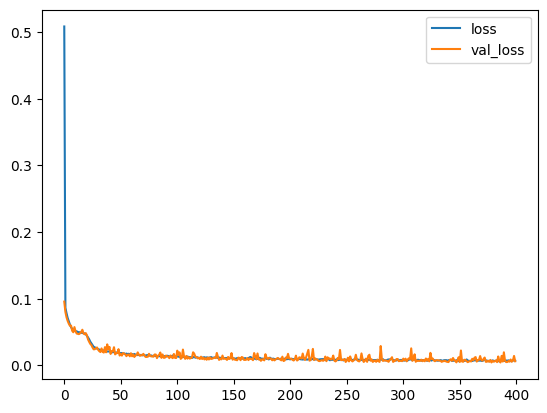

In [43]:
losses.plot()

In [44]:
pred = model.predict(X_test)

1520/1520 [==============================] - 7s 4ms/step


In [45]:
mean_absolute_error(y_test,pred)

0.02554925024336606

In [46]:
import numpy as np
np.sqrt(mean_squared_error(y_test,pred))

0.07952173839862017

In [47]:
filtered_air_pollution_df['air_quality_index'].describe()

count    147359.000000
mean          2.430391
std           1.142923
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: air_quality_index, dtype: float64

In [49]:
# Explained Variance score for deeper understanding
explained_variance_score(y_test,pred)

0.9953589978926943

Text(0.5, 1.0, 'Test set vs predicted set')

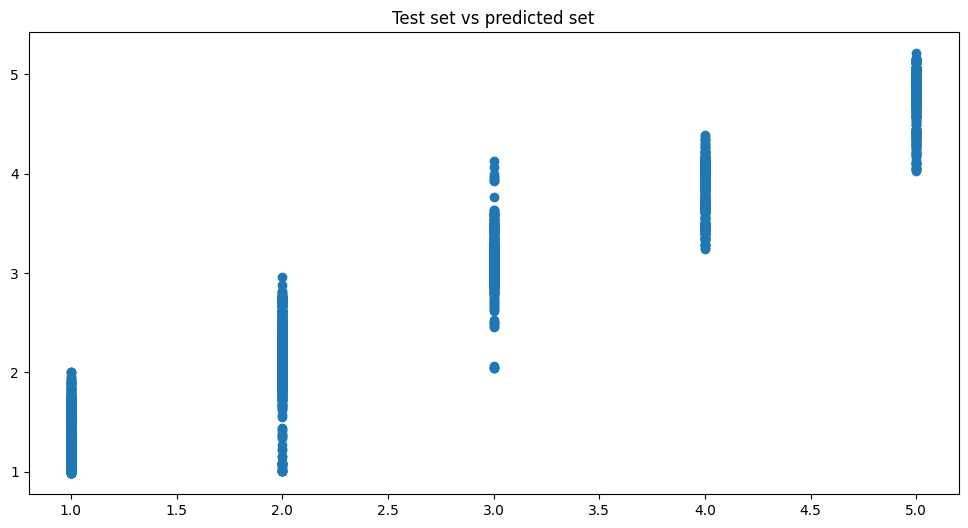

In [50]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,pred)
plt.title("Test set vs predicted set")

## Predicting on a new single Value

In [68]:
single_air_pollution = filtered_air_pollution_df.drop('air_quality_index',axis=1).iloc[30000]

In [69]:
single_air_pollution = scaler.transform(single_air_pollution.values.reshape(-1,13))

In [70]:
model.predict(single_air_pollution)

1/1 [==============================] - 0s 43ms/step


array([[3.0160456]], dtype=float32)

In [82]:
filtered_air_pollution_df.head()

,air_quality_index,lat,lon,CO_conc,NO_conc,NO2_conc,O3_conc,SO2_conc,fine_prtcls,coarse_prtcls,ammonia,year,month,day
0,2,-1.2837,36.7494,580.79,0.53,5.10,42.92,6.32,9.98,21.97,6.14,2021,1,1
1,1,-1.2837,36.7494,554.09,0.41,5.40,39.34,6.91,7.78,18.73,6.46,2021,1,1
2,1,-1.2837,36.7494,494.00,0.34,5.40,36.12,6.91,5.88,15.08,6.21,2021,1,1
3,1,-1.2837,36.7494,447.27,0.33,4.63,34.69,5.96,4.63,12.55,5.70,2021,1,1
4,1,-1.2837,36.7494,403.88,0.30,3.98,31.83,4.83,3.60,10.23,5.00,2021,1,1


In [71]:
filtered_air_pollution_df['air_quality_index'][30000]

3